<a href="https://colab.research.google.com/github/Saddam705/Online_retail_customer_segmentati/blob/main/Online_retail_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Online Retail Customer Segmentation.**
## **Problem Description**
**In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

# **Data Description**
##**Attribute Information:**
**InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.**

**StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.**

**Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.**

**UnitPrice: Unit price. Numeric, Product price per unit in sterling.**

**CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.**

**Country: Country name. Nominal, the name of the country where each customer resides.**

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math
import datetime 
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df=pd.read_csv('/content/drive/MyDrive/Almabetter course/capston project/ML 4 retail customer segmentation/Online Retail.xlsx - Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [42]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [43]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [44]:
df.shape

(541909, 8)

**Shape of our dataset is (541909, 8) that means we have 541909 number of rows and 8 columns**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**There is some null value present in our dataset like in CustomerID and Description**

In [46]:
df.dropna(inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [48]:
df.shape

(406829, 8)

**after removing null values there are 406829 rows and 8 columns**

In [49]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [50]:
df=df[~df['InvoiceNo'].str.contains('C')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


**we have droped some invoiceno which were contains 'C' because 'C' indicates that the order is cancelled.**

In [51]:
df.shape

(397924, 8)

In [52]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

##**Exploratory data analysis**

In [53]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [54]:
description_df = df['Description'].value_counts().reset_index()
description_df.rename(columns={'index':'Description_name'},inplace=True)
description_df.rename(columns={'Description':'Count'},inplace=True)
description_df.head()

,Description_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [55]:
description_df.tail()

,Description_name,Count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


<Axes: title={'center': 'Top five product name'}, xlabel='Description_name', ylabel='Count'>

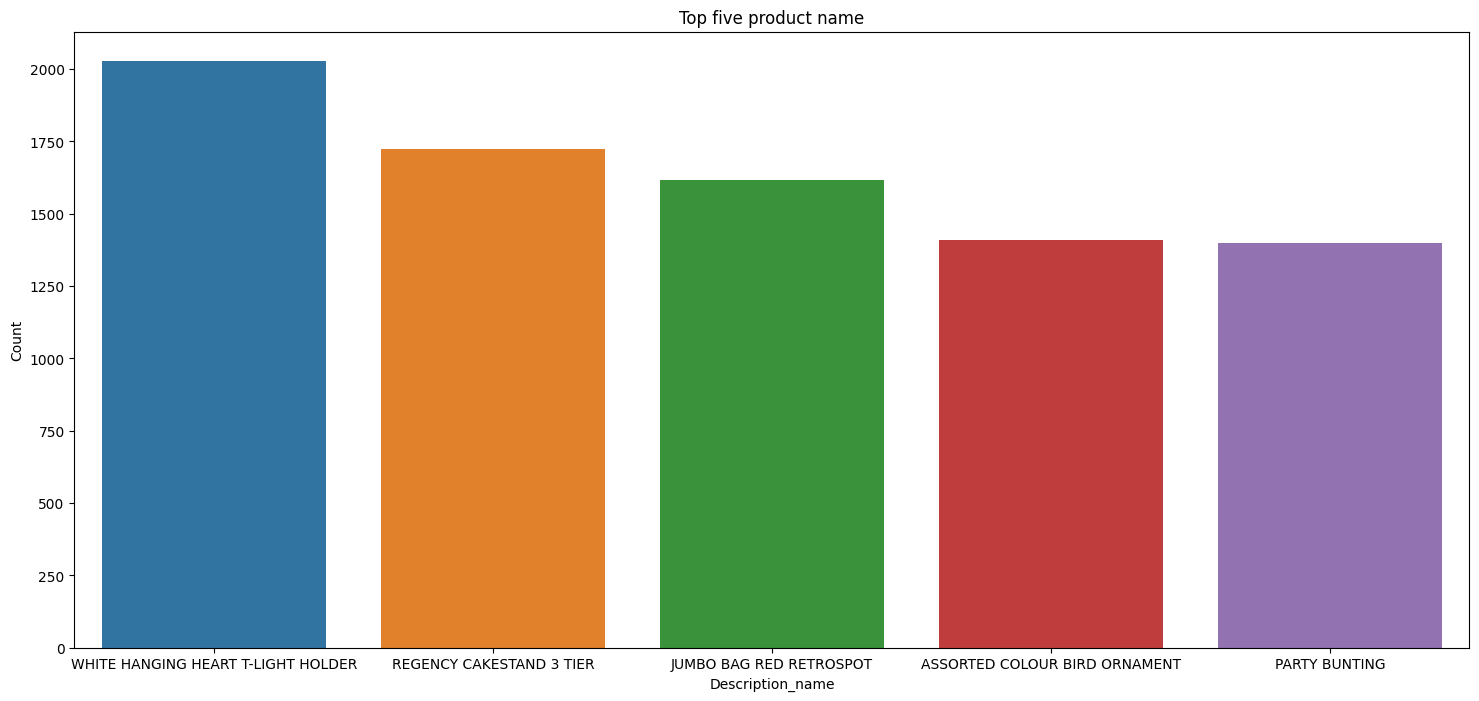

In [56]:
plt.figure(figsize=(18,8))
plt.title("Top five product name")
sns.barplot(x='Description_name',y='Count',data=description_df[:5])

**Top product based on maximum selling are :**

1.WHITE HANGING HEART T-LIGHT HOLDER,  
2.REGENCY CAKESTAND 3 TIER    
3.JUMBO BAG RED RETROSPOT  
4.PARTY BUNTING  
5.LUNCH BAG RED RETROSPOT

<Axes: title={'center': 'Top five product name'}, xlabel='Description_name', ylabel='Count'>

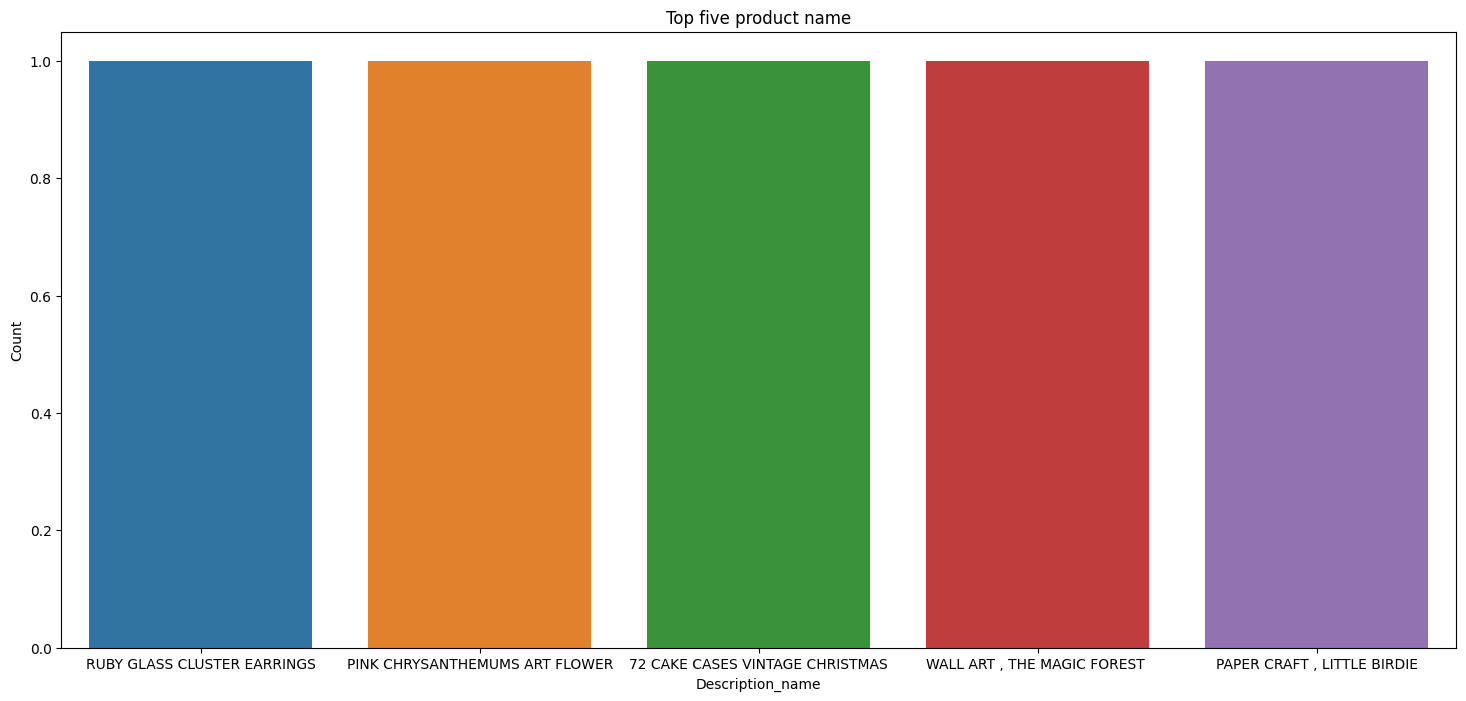

In [57]:
plt.figure(figsize=(18,8))
plt.title("Top five product name")
sns.barplot(x='Description_name',y='Count',data=description_df[-5:])

**Bottom 5 Product based on the selling are:**  
1.LIGHT DECORATION BATTERY OPERATED	  
2.Water damaged	   
3.throw away	  
4.re dotcom quick fix.	
5.BIRTHDAY BANNER TAPE


In [58]:
StockCode_df = df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index':'stockcode_name'},inplace=True)
StockCode_df.rename(columns={'StockCode':'Count'},inplace= True)
StockCode_df.head()

,stockcode_name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


In [59]:
StockCode_df.tail()

,stockcode_name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


<Axes: title={'center': 'top 5 Stock name'}, xlabel='stockcode_name', ylabel='Count'>

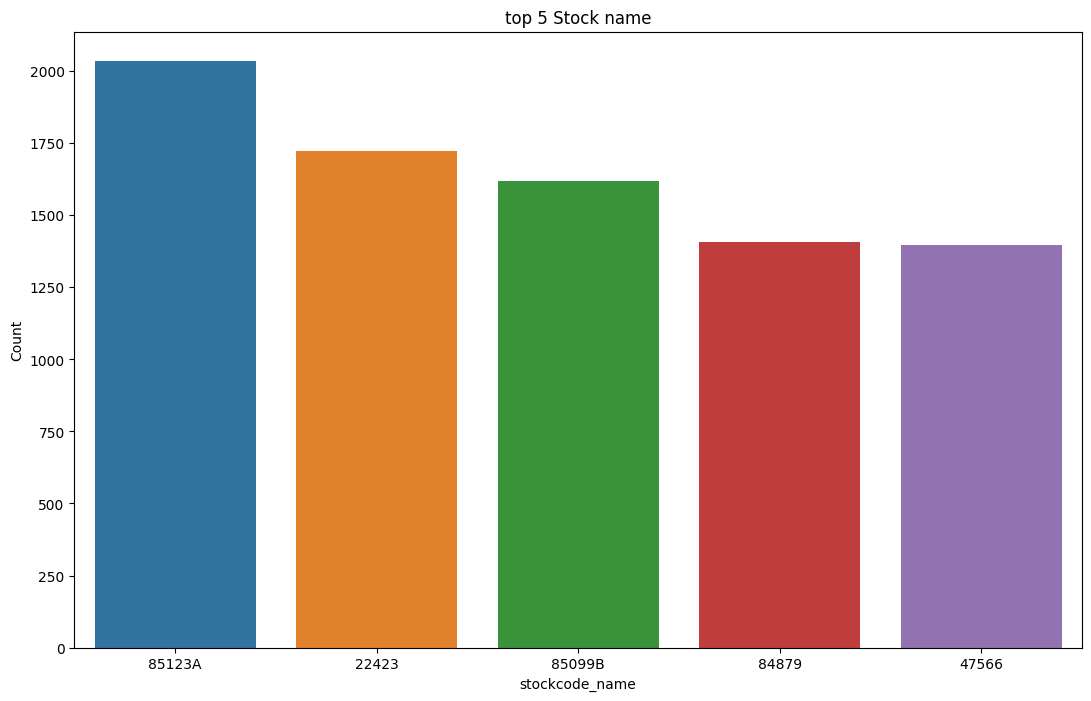

In [61]:
plt.figure(figsize=(13,8))
plt.title('top 5 Stock name')
sns.barplot(x='stockcode_name',y='Count',data=StockCode_df[:5])

**Top 5 Stock name based on selling are :**  
1.85123A   
2.22423   
3.85099B	   
4.47566  
5.20725

<Axes: title={'center': 'top 5 Stock name'}, xlabel='stockcode_name', ylabel='Count'>

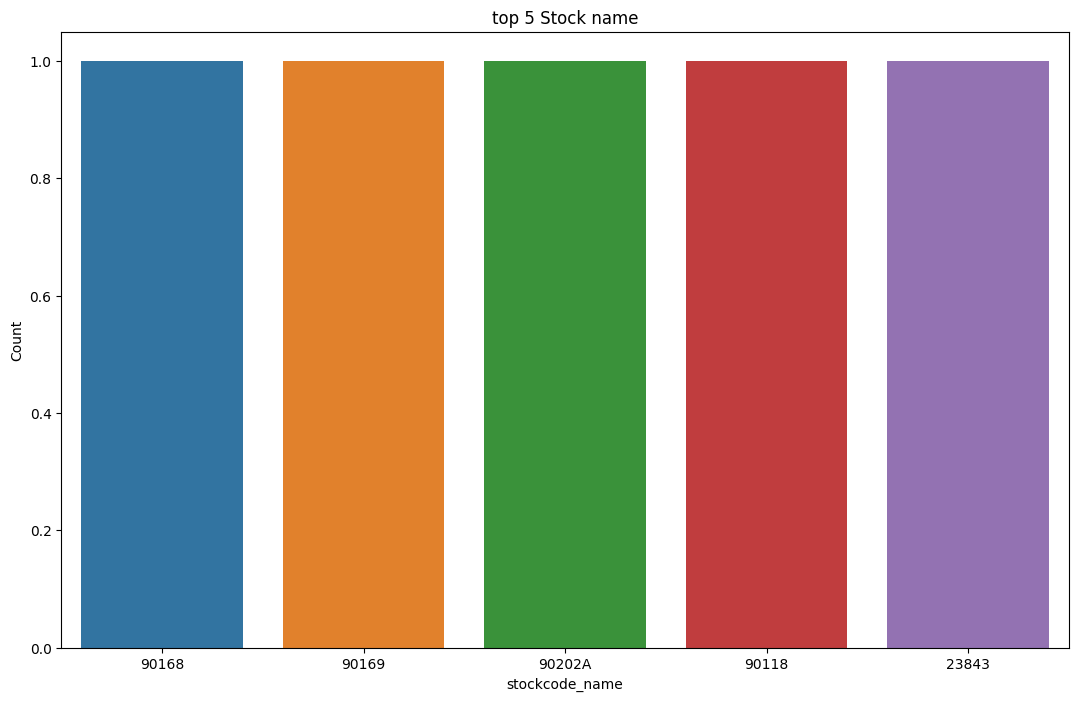

In [62]:
plt.figure(figsize=(13,8))
plt.title('top 5 Stock name')
sns.barplot(x='stockcode_name',y='Count',data=StockCode_df[-5:])

In [66]:
country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns={'index':'Country_name'},inplace=True)
country_df.rename(columns={'Country':'Count'},inplace=True)
country_df.head()

,Country_name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


<Axes: title={'center': 'top 5 country name'}, xlabel='Country_name', ylabel='Count'>

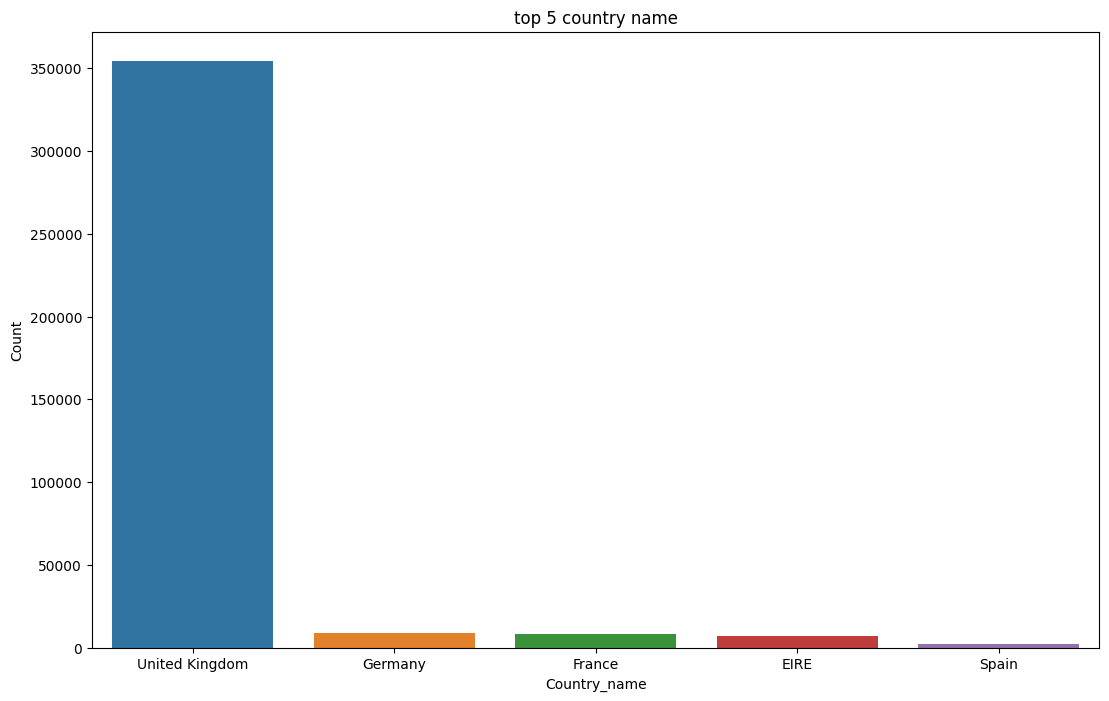

In [68]:
plt.figure(figsize=(13,8))
plt.title('top 5 country name')
sns.barplot(x='Country_name',y='Count',data=country_df[:5])

**From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain**

<Axes: title={'center': 'top 5 country name'}, xlabel='Country_name', ylabel='Count'>

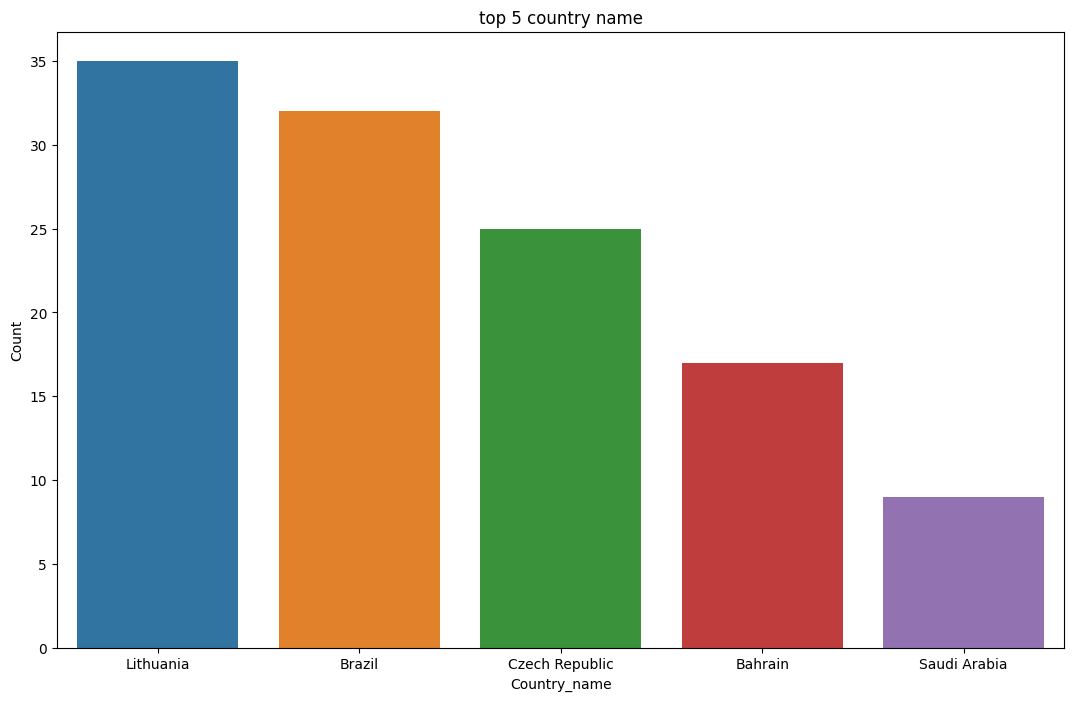

In [69]:
plt.figure(figsize=(13,8))
plt.title('top 5 country name')
sns.barplot(x='Country_name',y='Count',data=country_df[-5:])

**From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia**

In [70]:
df[df['Country']=='Saudi Arabia']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12,2/24/11 10:34,0.42,12565.0,Saudi Arabia
100811,544838,22363,GLASS JAR MARMALADE,6,2/24/11 10:34,2.95,12565.0,Saudi Arabia
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6,2/24/11 10:34,2.95,12565.0,Saudi Arabia
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2/24/11 10:34,2.95,12565.0,Saudi Arabia
100814,544838,22553,PLASTERS IN TIN SKULLS,12,2/24/11 10:34,1.65,12565.0,Saudi Arabia
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12,2/24/11 10:34,1.65,12565.0,Saudi Arabia
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12,2/24/11 10:34,1.65,12565.0,Saudi Arabia
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2,2/24/11 10:34,5.49,12565.0,Saudi Arabia
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12,2/24/11 10:34,1.45,12565.0,Saudi Arabia


**1. Positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.hear mean>median>mode**

**2. Negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.hear mean<median<mode**

**3. For symmetric graph mean=median=mode**

<Axes: title={'center': 'Distribution of quantity'}, xlabel='Quantity', ylabel='Density'>

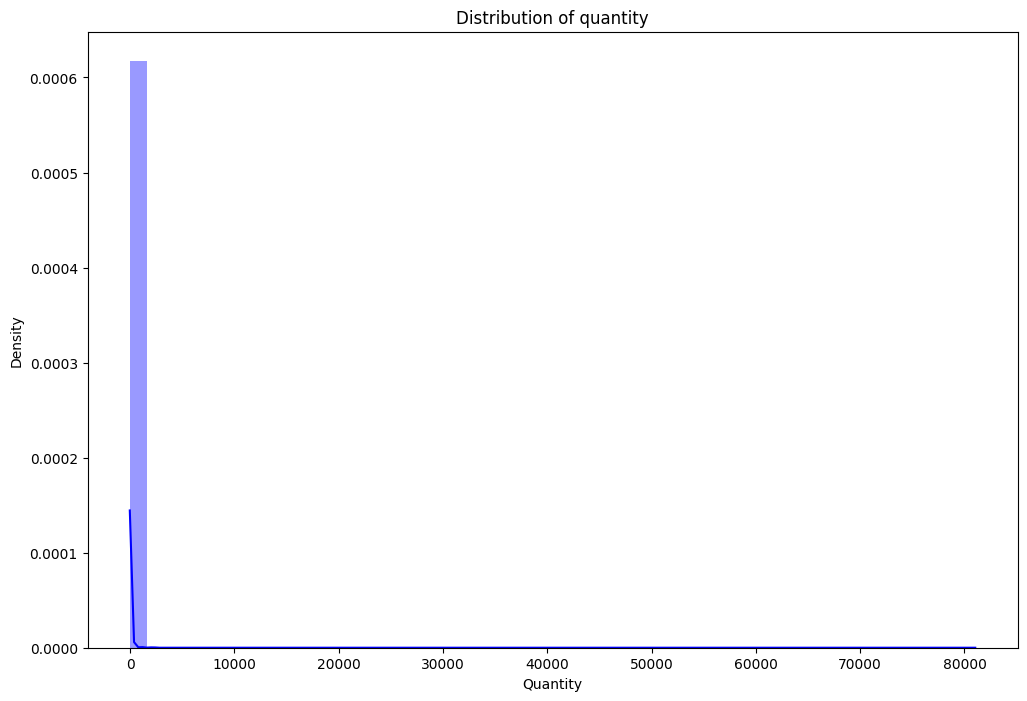

In [75]:
plt.figure(figsize=(12,8))
plt.title("Distribution of quantity")
sns.distplot(df['Quantity'],color="blue")

<Axes: title={'center': 'Distribution of quantity'}, xlabel='Quantity', ylabel='Density'>

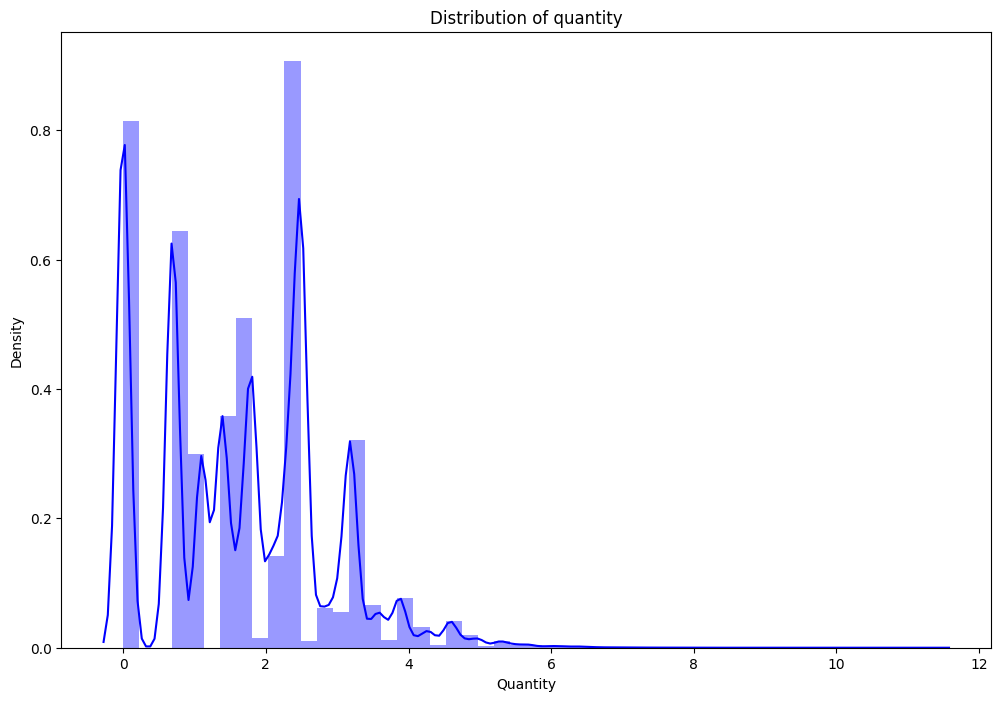

In [76]:
plt.figure(figsize=(12,8))
plt.title("Distribution of quantity")
sns.distplot(np.log(df['Quantity']),color="blue")

In [77]:
df['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


<Axes: title={'center': 'Distribution of Unit price'}, xlabel='UnitPrice', ylabel='Density'>

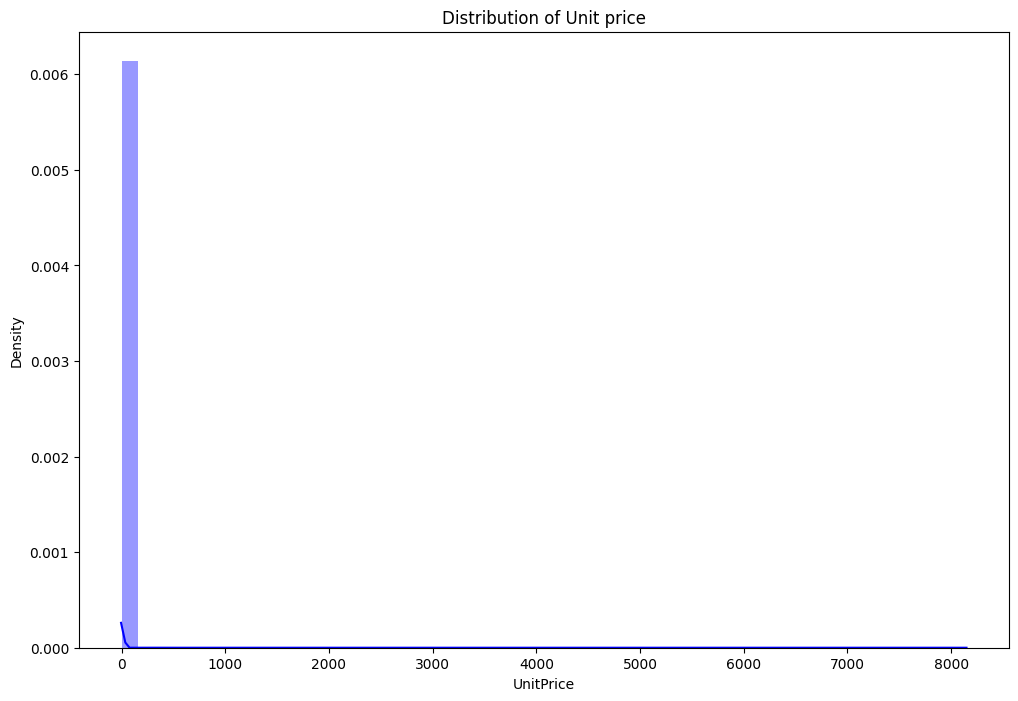

In [79]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Unit price")
sns.distplot(df['UnitPrice'],color="blue")

In [82]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


#**Feature Engineering**

In [86]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

###**Convert InvoiceDate columns into date time formate**

In [90]:
df['Day'] = df['InvoiceDate'].dt.day_name()

###**Create a new features Day from Invoicedate**

In [92]:
df['Year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['Month_num'] = df['InvoiceDate'].apply(lambda x: x.month)
df['Day_num'] = df['InvoiceDate'].apply(lambda x: x.day)
df['hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['Minute'] = df['InvoiceDate'].apply(lambda x: x.minute)

In [93]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Year,Month_num,Day_num,hour,Minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26


##**Create some new features from Invoicedate like hours,year,month_num,day_num**

In [96]:
df['TotalAmount'] = df['Quantity']*df['UnitPrice']

**Create a new features TotalAmount from form product of Quantity and Unitprice**

In [98]:
df['Month'] = df['InvoiceDate'].dt.month_name()

In [99]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Year,Month_num,Day_num,hour,Minute,TotalAmount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December


<Axes: title={'center': 'distribution of amount'}, xlabel='TotalAmount', ylabel='Density'>

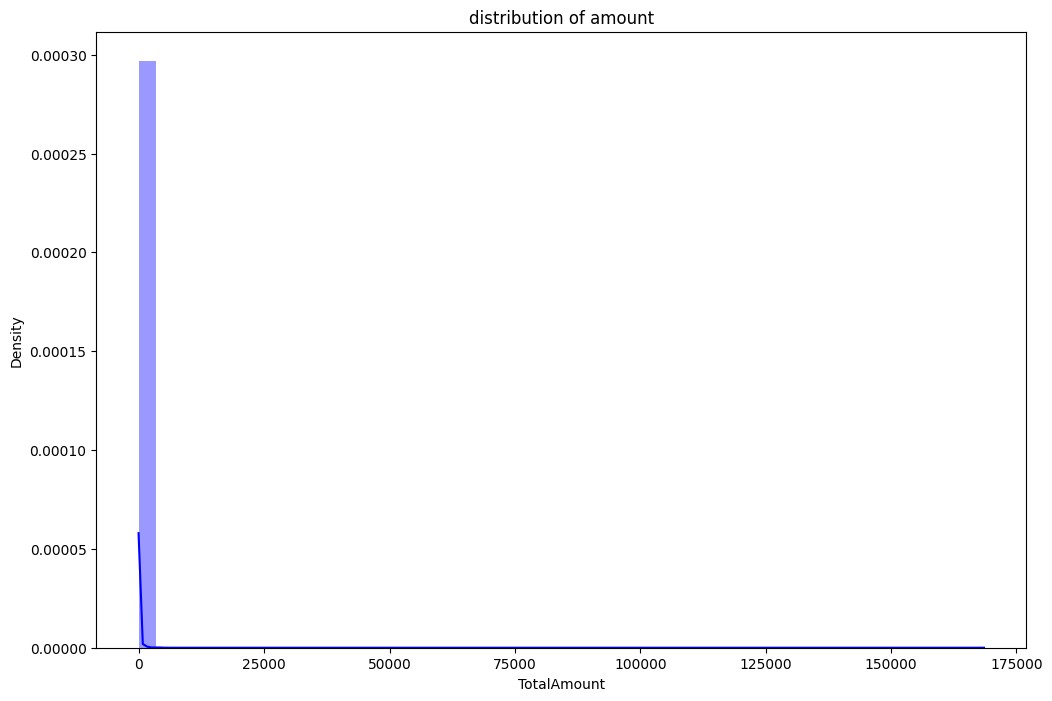

In [101]:
plt.figure(figsize=(12,8))
plt.title("distribution of amount")
sns.distplot(df['TotalAmount'],color='Blue')

In [102]:
df['TotalAmount'].describe()

count    397924.000000
mean         22.394749
std         309.055588
min           0.000000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

<Axes: >

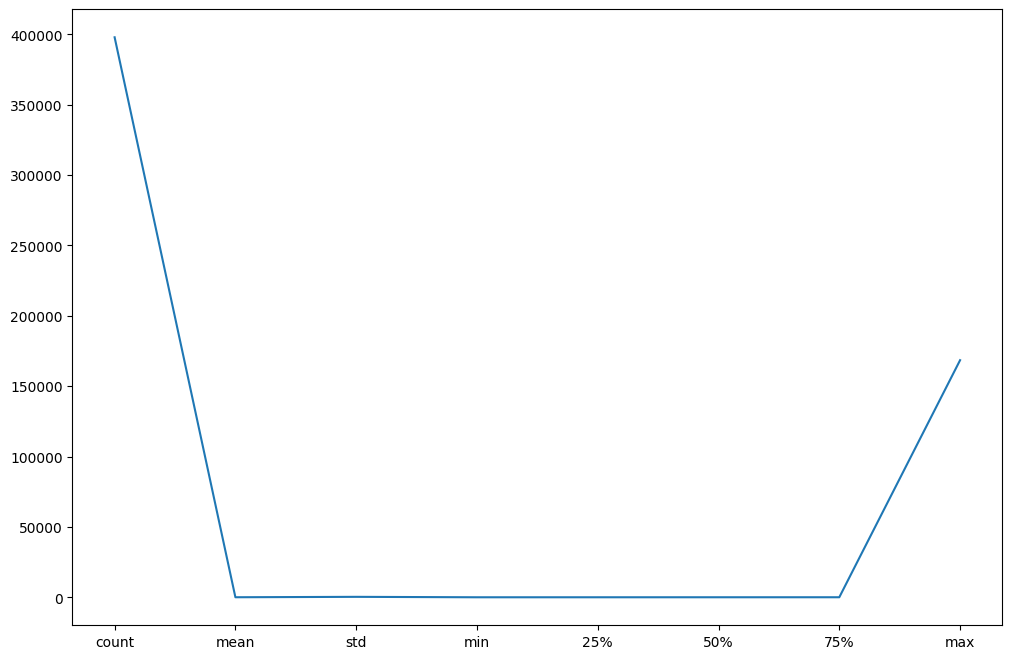

In [103]:
plt.figure(figsize=(12,8))
df['TotalAmount'].describe().plot()

In [104]:
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


<Axes: title={'center': 'Day'}, xlabel='Day_Name', ylabel='Count'>

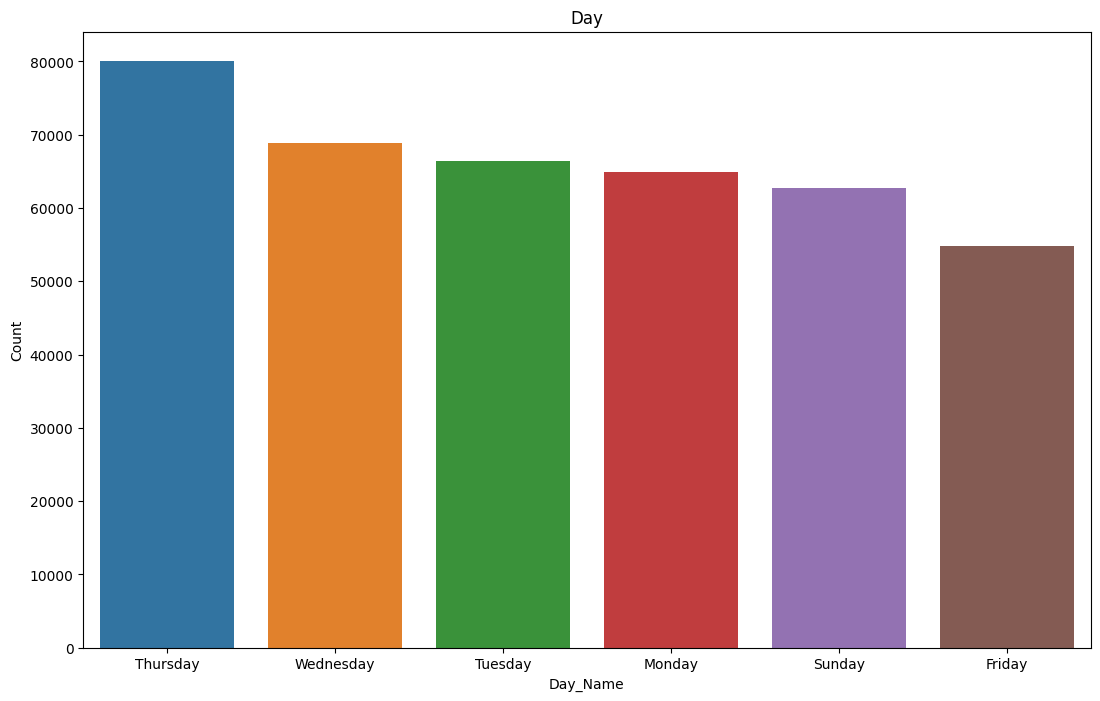

In [105]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

<Axes: xlabel='Day', ylabel='count'>

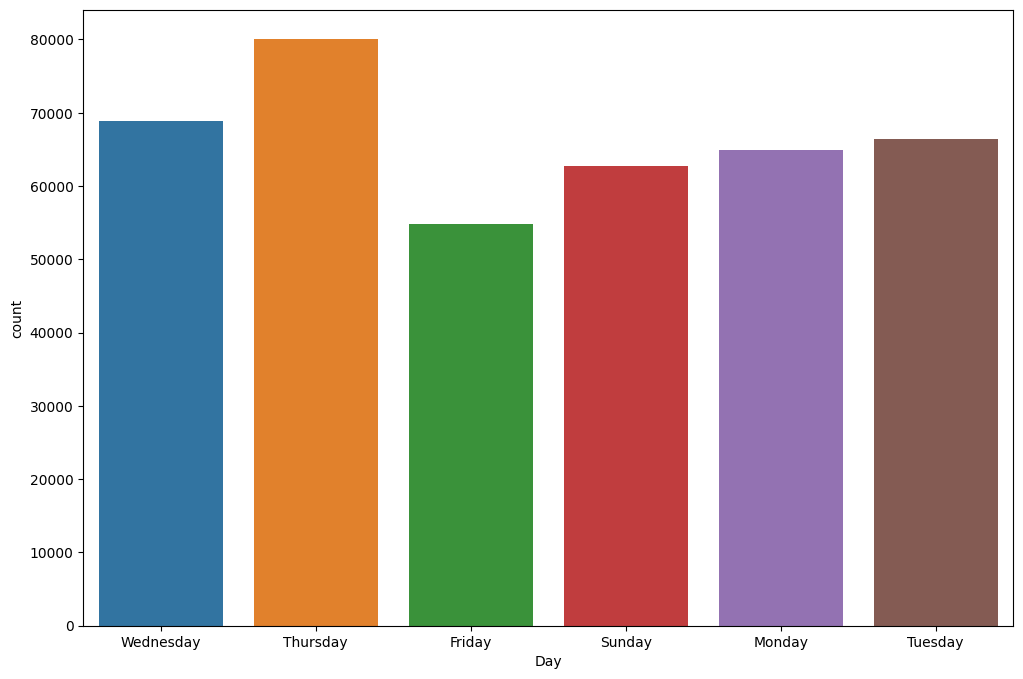

In [115]:
plt.figure(figsize=(12,8))
sns.countplot(x='Day',data=df)

**Most of the customers have purches the items in Thursday ,Wednesday and Tuesday**

In [116]:
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


<Axes: title={'center': 'Month'}, xlabel='Month_Name', ylabel='Count'>

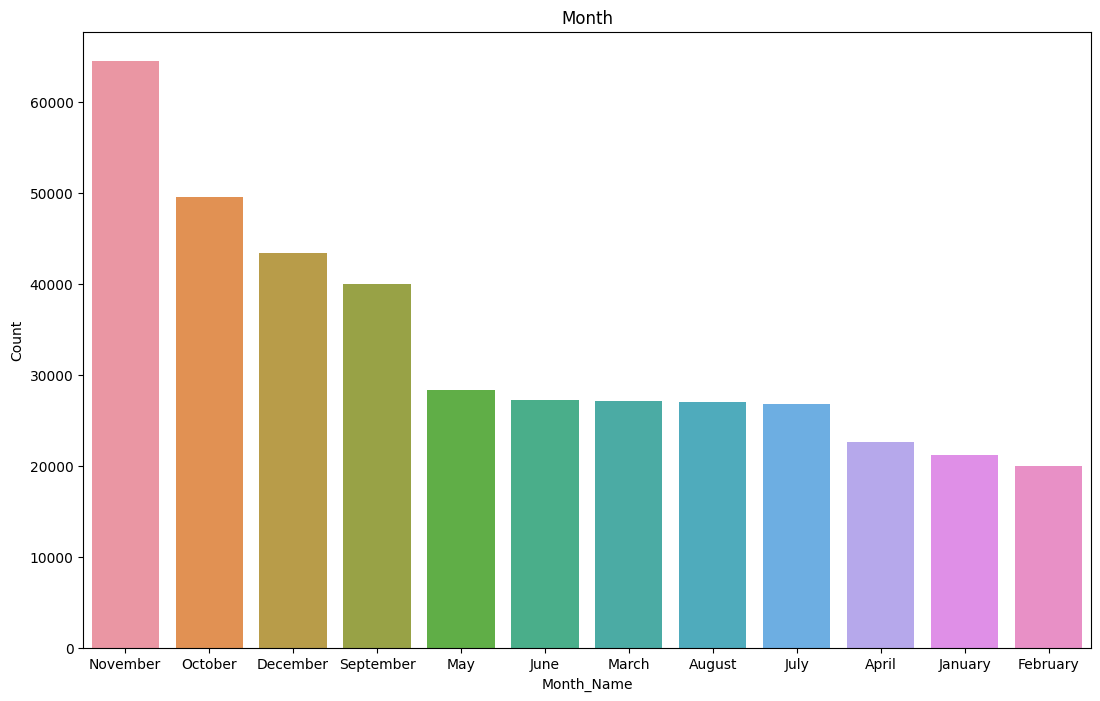

In [117]:
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

##**most numbers of customers have purches the gifts in the month of November ,October and December September**
**less numbers of customers have purches the gifts in the month of April ,january and February**

In [118]:
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


<Axes: title={'center': 'Hour'}, xlabel='Hour_Name', ylabel='Count'>

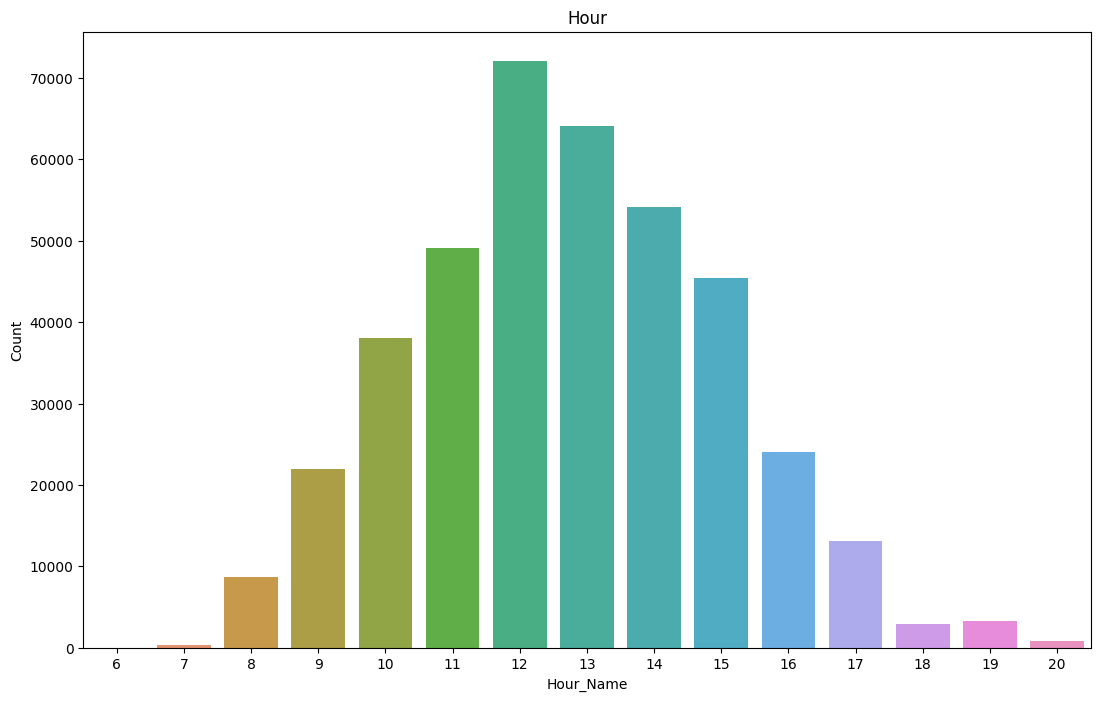

In [119]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

###**From this graph we can see that in AfterNone Time most of the customers have purches the item.**